<a href="https://colab.research.google.com/github/ferayerdi/Actividades-IA/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombres:**

*   Fernanda Adilsa Ayerdi                   1727025   
*   Miguel Rojas Salgado                     2082272
*   Jorge Manual Garcia Marquez              2077797
*   Oscar Angel Villarreal Quezada 1916103                        
*   Kevin Eduardo Cruz Antonio               2077294

**Grupo:** 002 Sabatinos

In [1]:
#para los graficos y librerias
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import os
import glob

In [2]:
!pip install kaggle
from google.colab import files

In [3]:
#sirve para subir el kaggle.json que se descarga de kaggle y que nos permite usar el datatset
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fernandaayerdi","key":"99ae0e84d2f5f5eb9122634ac811b554"}'}

In [4]:
# Mover el archivo kaggle.json al directorio correcto
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Establecer permisos adecuados
!chmod 600 ~/.kaggle/kaggle.json

#para descargar conjunto de datos
!kaggle datasets download -d thomasdubail/brain-tumors-256x256

 99% 59.0M/59.4M [00:04<00:00, 25.5MB/s]
100% 59.4M/59.4M [00:04<00:00, 15.1MB/s]


In [5]:
!unzip -q /content/brain-tumors-256x256.zip -d /content/Dataset

In [6]:
imagenes = []
etiquetas = []

In [7]:
# Ruta de la carpeta principal
carpeta_principal = '/content/Dataset/Data'

# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron = os.path.join(carpeta_principal, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Itera sobre las subcarpetas encontradas
z=0
for subcarpeta in subcarpetas:

    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)
        # Haz algo con la subcarpeta si es necesario

        for x in glob.iglob(f'{subcarpeta}/*.jpg'):
          print(x)
          test_image = cv2.imread(x)

          # Formato de imagen
          img_resized = cv2.resize(test_image, (32,32), )

          # Guardar imagenes y etiquetas
          arreglo_imagen = np.array(img_resized)
          imagenes.append(arreglo_imagen)
          etiquetas.append(z)
        z += 1

Subcarpeta: /content/Dataset/Data/normal
/content/Dataset/Data/normal/N_286.jpg
/content/Dataset/Data/normal/N_95.jpg
/content/Dataset/Data/normal/N_100.jpg
/content/Dataset/Data/normal/N_158.jpg
/content/Dataset/Data/normal/N_27.jpg
/content/Dataset/Data/normal/N_149.jpg
/content/Dataset/Data/normal/N_395.jpg
/content/Dataset/Data/normal/N_134.jpg
/content/Dataset/Data/normal/N_224.jpg
/content/Dataset/Data/normal/N_437.jpg
/content/Dataset/Data/normal/N_408.jpg
/content/Dataset/Data/normal/N_314.jpg
/content/Dataset/Data/normal/N_373.jpg
/content/Dataset/Data/normal/N_30.jpg
/content/Dataset/Data/normal/N_206.jpg
/content/Dataset/Data/normal/N_372.jpg
/content/Dataset/Data/normal/N_358.jpg
/content/Dataset/Data/normal/N_67.jpg
/content/Dataset/Data/normal/N_33.jpg
/content/Dataset/Data/normal/N_428.jpg
/content/Dataset/Data/normal/N_257.jpg
/content/Dataset/Data/normal/N_226.jpg
/content/Dataset/Data/normal/N_311.jpg
/content/Dataset/Data/normal/N_14.jpg
/content/Dataset/Data/normal/

In [8]:
etiquetas = np.array(etiquetas)

In [9]:
images= np.array(imagenes)

In [10]:
np.shape(etiquetas)

(3096,)

In [11]:
len(imagenes)

3096

In [12]:
etiquetas [-1]

3

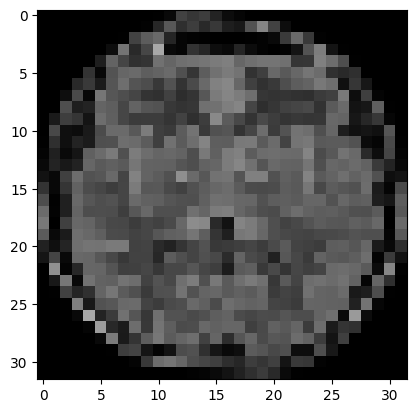

In [13]:
plt.imshow(imagenes[10])


In [14]:
# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
images_train, images_test, labels_train, labels_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

In [15]:
# Convertir las listas en arreglos NumPy
images_train = np.array(images_train)
labels_train = np.array(labels_train)
images_test = np.array(images_test)
labels_test = np.array(labels_test)

Esta es la parte convolucional de la red neuronal:

In [16]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

Y esta es la parte de clasificacion:

In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))

In [19]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [20]:
#Entrenamiento y compilacion del modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(images_train, labels_train, epochs=50,
                    validation_data=(images_test, labels_test))

Epoch 1/50
78/78 [==============================] - 5s 45ms/step - loss: 2.5820 - accuracy: 0.4225 - val_loss: 1.1620 - val_accuracy: 0.5323
Epoch 2/50
78/78 [==============================] - 5s 58ms/step - loss: 0.9755 - accuracy: 0.5788 - val_loss: 1.0238 - val_accuracy: 0.5742
Epoch 3/50
78/78 [==============================] - 3s 41ms/step - loss: 0.8122 - accuracy: 0.6595 - val_loss: 0.9087 - val_accuracy: 0.6306
Epoch 4/50
78/78 [==============================] - 3s 40ms/step - loss: 0.6479 - accuracy: 0.7419 - val_loss: 0.9152 - val_accuracy: 0.6306
Epoch 5/50
78/78 [==============================] - 4s 47ms/step - loss: 0.5507 - accuracy: 0.7807 - val_loss: 0.7813 - val_accuracy: 0.6935
Epoch 6/50
78/78 [==============================] - 4s 53ms/step - loss: 0.4577 - accuracy: 0.8255 - val_loss: 0.8048 - val_accuracy: 0.6855
Epoch 7/50
78/78 [==============================] - 3s 41ms/step - loss: 0.3790 - accuracy: 0.8582 - val_loss: 0.6807 - val_accuracy: 0.7581
Epoch 8/50
78



*   Nuestro EPOCH: 50 fue del 82%, lo cual es un modelo suficientemente eficiente, podemos observar en el siguiente grafico como por un momento el rendimiento fue bajando, pero luego empezo otra vez a subir y mantenerse mas estable.




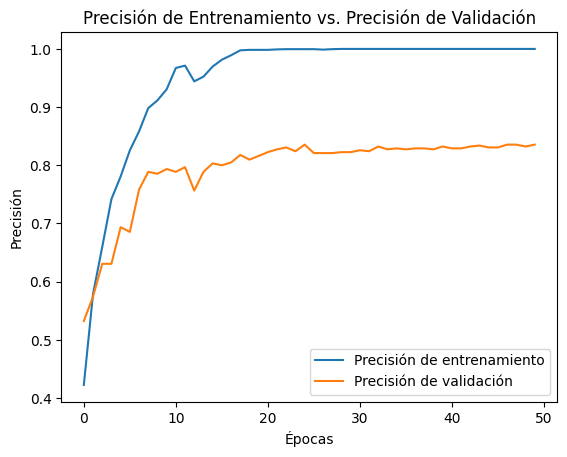

In [21]:
# Extrae la precisión de entrenamiento y validación de 'history'
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Crea el gráfico de precisión de entrenamiento vs. precisión de validación
plt.plot(train_accuracy, label='Precisión de entrenamiento')
plt.plot(val_accuracy, label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión de Entrenamiento vs. Precisión de Validación')
plt.show()

In [22]:
predictions = model.predict(images_test)

# Decodifica las predicciones (si es necesario) y muestra los resultados
n_predicciones = 5  # Número de predicciones a mostrar

for i in range(n_predicciones):
    # Supongamos que las predicciones son clases numéricas
    clase_predicha = np.argmax(predictions[i])

    # Muestra la clase predicha y la probabilidad asociada (opcional)
    print(f'Predicción {i + 1}: Clase {clase_predicha} (Probabilidad: {predictions[i][clase_predicha]:.2f})')

20/20 [==============================] - 1s 25ms/step
Predicción 1: Clase 2 (Probabilidad: 13.78)
Predicción 2: Clase 2 (Probabilidad: 7.87)
Predicción 3: Clase 2 (Probabilidad: 7.93)
Predicción 4: Clase 3 (Probabilidad: 9.87)
Predicción 5: Clase 3 (Probabilidad: 7.68)
